# Forward and Back Propagation- Chain Rule and Memoizaton

## Math prerequisites

### **What is a Derivative?**


- A derivative measures how a function changes as its input changes.
- It represents the slope of the tangent line to the function's graph at a specific point.

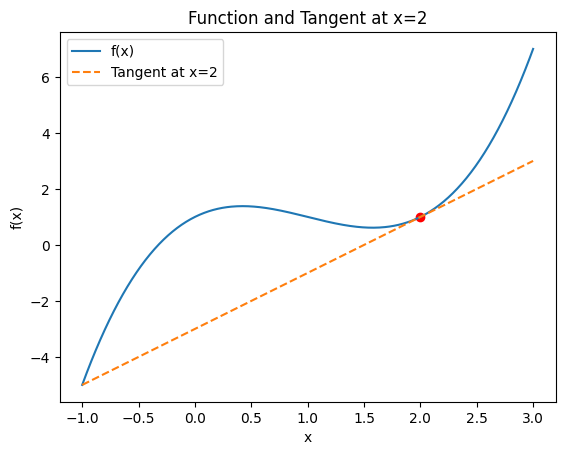

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
f = lambda x: x**3 - 3*x**2 + 2*x + 1
f_prime = lambda x: 3*x**2 - 6*x + 2

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y, label='f(x)')

# Plot tangent line at x=2
x0 = 2
y0 = f(x0)
slope = f_prime(x0)

tangent_line = slope * (x - x0) + y0
plt.plot(x, tangent_line, '--', label=f'Tangent at x={x0}')

plt.scatter([x0], [y0], color='red')
plt.legend()
plt.title('Function and Tangent at x=2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Equation of the Curve:**
$$
f(x) = x^3 - 3x^2 + 2x + 1
$$

Derivative (using power rule):
$$
f'(x) = \frac{d}{dx}(x^3 - 3x^2 + 2x + 1) = 3x^2 - 6x + 2
$$

Computing the slope at $x=2$:
$$
f'(2) = 3(2)^2 - 6(2) + 2 = 12 - 12 + 2 = 2
$$

The slope of the tangent line at $x=2$ is $2$.

**Small Change Approximation**
- Original value:
  $$ f(2) = 2^3 - 3 \times 2^2 + 2 \times 2 + 1 = 1 $$
- After a small increase $\Delta x = 0.1$:
  $$ f(2.1) = 2.1^3 - 3 \times 2.1^2 + 2 \times 2.1 + 1 = 1.231 $$
- Actual change:
  $$ \Delta f = f(2.1) - f(2) = 0.231 $$
- Predicted change using derivative:
  $$ \Delta f \approx f'(2) \times \Delta x = 2 \times 0.1 = 0.2 $$
- The actual change (0.231) is very close to the predicted change (0.2), confirming that the derivative gives a good approximation for small changes.

### **Partial Derivatives**

Partial derivatives extend the concept of derivatives to functions with multiple variables, such as $f(x,y)$. Unlike single-variable derivatives that measure the rate of change along one dimension, partial derivatives measure the rate of change of the function with respect to one variable while **holding all other variables constant**.

When working with functions of multiple variables, such as $ f(x, y, z) $, the **partial derivative** measures the rate at which the function changes with respect to one variable while keeping the other variables constant. This concept extends the idea of a single-variable derivative to multivariable functions.

**Notation**
The symbol for a partial derivative is $ \partial $, distinguishing it from the total derivative. The partial derivative of $ f $ with respect to variable $ x $ is written as:

$$
\frac{\partial f}{\partial x}
$$

or equivalently, $ f_x $ or $ \partial_x f $.

**Formal Definition**
Given a function $ f: U \subseteq \mathbb{R}^n \to \mathbb{R} $, the partial derivative of $ f $ at a point $ \mathbf{a} = (a_1, ..., a_n) $ with respect to the $ i^{th} $ variable $ x_i $ is defined as:

$$
\frac{\partial}{\partial x_i} f(\mathbf{a}) = \lim_{h \to 0} \frac{f(a_1, ..., a_{i-1}, a_i + h, a_{i+1}, ..., a_n) - f(a_1, ..., a_n)}{h}
$$

This limit measures the instantaneous rate of change of $ f $ along the $ x_i $-axis, holding other variables fixed.

#### Geometric Interpretation

Visualize a surface $f(x,y)$ as a landscape. At a fixed point $(x,y)$:
- The partial derivative with respect to $x$, $\frac{\partial f}{\partial x}$, corresponds to the slope of the curve obtained by slicing the surface along the $x$-direction (holding $y$ constant).
- Similarly, $\frac{\partial f}{\partial y}$ corresponds to the slope in the $y$-direction.

- Since the slope may differ depending on direction, the concept of "the" tangent line generalizes to many tangent lines in multivariable contexts. Thus, specifying the variable with respect to which the derivative is taken is crucial.

For a given multivariate function
$$
f(x,y) = x^2 + y^3
$$
Partial derivatives are:
$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 3y^2
$$

**What is a Gradient?**

The gradient is just a fancy term used when you take the derivative of a function with respect to all of its variables. In essence, it is a collection of all the partial derivatives of a function.

The **gradient** of $ f $, denoted $ \nabla f $, is the vector of all partial derivatives with respect to each variable:

$$
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

It points in the direction of steepest ascent of the function and its magnitude measures the rate of increase.

Building on the concept of the gradient, the **directional derivative** extends the idea of rate of change of a function in a specified direction beyond just the coordinate axes. Consider a function $ f(x, y) $ representing a surface over a 3D space. At a given point $ P = (x_0, y_0) $, partial derivatives describe the rate of change of $ f $ strictly along the $ x $- or $ y $-axes, keeping the other variable constant.

However, in many scenarios, we want to understand how $ f $ changes when moving in any arbitrary direction, not just along the coordinate axes. This is where the directional derivative comes into play.

The directional derivative $ D_{\mathbf{u}} f(P) $ measures the instantaneous rate of change of $ f $ at point $ P $ when moving in the direction of a unit vector $ \mathbf{u} $.

To compute it:

1. **Ensure $ \mathbf{u} $ is a unit vector** representing the direction of interest.
2. **Calculate the gradient vector $ \nabla f(P) $**, which bundles all partial derivatives at $ P $.
3. **Take the dot product** of $ \nabla f(P) $ with the direction vector $ \mathbf{u} $:

$$
D_{\mathbf{u}} f(P) = \nabla f(P) \cdot \mathbf{u} = \frac{\partial f}{\partial x}(P) u_x + \frac{\partial f}{\partial y}(P) u_y
$$

This scalar value represents the slope or steepness of the surface in the direction $ \mathbf{u} $—akin to balancing on a seesaw oriented along that direction on the surface.

In practice, this allows one to *explore how a function behaves or changes at a point* in any desired direction, generalizing the concept of partial derivatives and revealing rich geometric and analytic structure inherent in multivariable functions.

For function $$ f(x,y) = x^2 + y^3 $$
$$
\nabla f = \begin{bmatrix} 2x \\ 3y^2 \end{bmatrix}
$$

The gradient points in the direction of the steepest increase of the function.

**Approximating Changes Using Partial Derivatives**

Suppose $$ f(x,y) = x^2 + y^2 $$ and initially $$ (x,y) = (3,4) $$, so:

$$
f(3,4) = 3^2 + 4^2 = 9 + 16 = 25
$$

If $ x $ is increased by $ \Delta x = 0.1 $ and $ y $ by $ \Delta y = 0.2 $, new values are:

$$
x' = 3.1, \quad y' = 4.2
$$

Calculate the new function value:

$$
f(3.1,4.2) = 3.1^2 + 4.2^2 = 9.61 + 17.64 = 27.25
$$

Actual change in $ f $:

$$
\Delta f = f(3.1,4.2) - f(3,4) = 27.25 - 25 = 2.25
$$

Using partial derivatives to approximate $ \Delta f $:

$$
\frac{\partial f}{\partial x} = 2x = 6, \quad \frac{\partial f}{\partial y} = 2y = 8
$$

Estimated change:

$$
\Delta f \approx \frac{\partial f}{\partial x} \Delta x + \frac{\partial f}{\partial y} \Delta y = 6 \times 0.1 + 8 \times 0.2 = 0.6 + 1.6 = 2.2
$$

The approximation of 2.2 is close to the actual change of 2.25, illustrating the predictive power of partial derivatives.

**Understanding the Significance of Partial Derivatives**

Partial derivatives quantify how the output of a multivariable function changes as each individual input variable varies, while all other variables remain fixed. This reveals the sensitivity of the output to each input independently.

- For example, consider a function $$f(x, y) = x^2 + y^2$$ at the point $$(x, y) = (3,4)$$.

- The partial derivative with respect to $x$ is:
  $$
  \frac{\partial f}{\partial x} = 2x = 2 \times 3 = 6
  $$
  This means that a small increase in $x$ changes the output approximately $6$ times that increase.

- If $x$ increases by $\Delta x = 0.1$, the output increases by roughly:
  $$
  \Delta f_x \approx 6 \times 0.1 = 0.6
  $$

- Similarly, the partial derivative with respect to $y$ is:
  $$
  \frac{\partial f}{\partial y} = 2y = 2 \times 4 = 8
  $$
  Meaning the function changes eight times the increment in $y$.

- For a change of $\Delta y = 0.2$, the output changes by approximately:
  $$
  \Delta f_y \approx 8 \times 0.2 = 1.6
  $$

- Together, these partial derivatives provide a clear, quantifiable measure of how each input influences the function’s output.

### The Chain Rule

The **chain rule** is a fundamental theorem in calculus used to compute the derivative of composite functions. It tells us how to find the rate of change when one variable depends on another which in turn depends on a third.

Suppose we have two functions:
- $ y = g(x) $
- $ z = f(y) $

Then, the derivative of the composite function $ z = f(g(x)) $ with respect to $ x $ is given by:

$$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}
$$

In Leibniz notation:

$$
\frac{d}{dx} f(g(x)) = f'(g(x)) \cdot g'(x)
$$

This states that the overall rate of change of $z$ with respect to $x$ is the product of:
- how fast $z$ changes with $y$, $ \frac{dz}{dy} $, and
- how fast $y$ changes with $x$, $ \frac{dy}{dx} $.

### Example

**Consider the functions:**

$$
y = 2x + 3
$$
$$
z = y^2
$$

**Step 1: Compute individual derivatives**

$$
\frac{dy}{dx} = 2
$$
$$
\frac{dz}{dy} = 2y
$$

**Step 2: Apply the chain rule**

$$
\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx} = 2y \cdot 2 = 4y
$$

**Step 3: Substitute $ y = 2x + 3 $**

$$
\frac{dz}{dx} = 4(2x + 3) = 8x + 12
$$

This derivative gives the total rate of change of $z$ with respect to $x$, accounting for how changes in $x$ affect $y$ and consequently $z$.

**The chain rule effectively decomposes the sensitivity of composite functions into the product of sensitivities at each stage layer. It allows derivatives of complex nested functions to be calculated using simpler derivatives of their inner and outer functions.**

**What is the derivative of $ h(x) = \sin(2x^2) $?**

Let:
$$ u = 2x^2 $$
$$ h(x) = \sin(u) $$

Using the chain rule:

$$
\frac{dh}{dx} = \cos(u) \cdot \frac{du}{dx} = \cos(2x^{2}) \cdot 4x
$$

**What is the derivative of $ g(x) = e^{3x^3 + 2x} $?**

Let:
$$ v = 3x^3 + 2x $$

Chain rule gives:

$$
\frac{dg}{dx} = e^{v} \cdot \frac{dv}{dx} = e^{3x^3 + 2x} \cdot (9x^2 + 2)
$$

#### Chain Rule to Partial Derivatives

When functions depend on multiple variables that themselves depend on other variables, the chain rule extends naturally.

Suppose:

$$
\text{If } h = g(p, q), \quad p = p(x,y), \quad q = q(x,y)
$$

Then the partial derivative of $ h $ with respect to $ x $ is:

$$
\frac{\partial h}{\partial x} = \frac{\partial h}{\partial p} \cdot \frac{\partial p}{\partial x} + \frac{\partial h}{\partial q} \cdot \frac{\partial q}{\partial x}
$$

This sums the contributions of all intermediate variables $ p, q $ to the change in $ h $ due to $ x $.